<a href="https://colab.research.google.com/github/Shravan1711/Projects-/blob/main/Heart%20Disease%20Diagnostic%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Diagnostic Analysis

In [1]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
#Extracting Dataset From System using Pandas Library

data = pd.read_csv('/content/Heart Disease data.csv')
data.shape

(1025, 14)

In [5]:
#Checking the names of the column

data.columns
     

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

There are 13 features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [6]:
#Null values checking

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset don't have any null value present. So we are good to go for further stage.

In [8]:
data.groupby('target').size()

target
0    499
1    526
dtype: int64

In [9]:
#Converting Numerical data into Categorical data

def heart_disease(row):
  if row == 0:
    return 'Absent'
  if row == 1:
    return 'Present'

In [10]:
#Attaching the categorical data 'heart_disease' to the dataset

data['heart_disease'] = data['target'].apply(heart_disease)
data.shape
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Present
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absent
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Absent
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absent
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absent


In [11]:
xy = data.groupby('heart_disease')['target'].count()
xy

heart_disease
Absent     499
Present    526
Name: target, dtype: int64

EXPLORATORY DATA ANALYSIS USING VARIOUS CHARTS AND GRAPHS

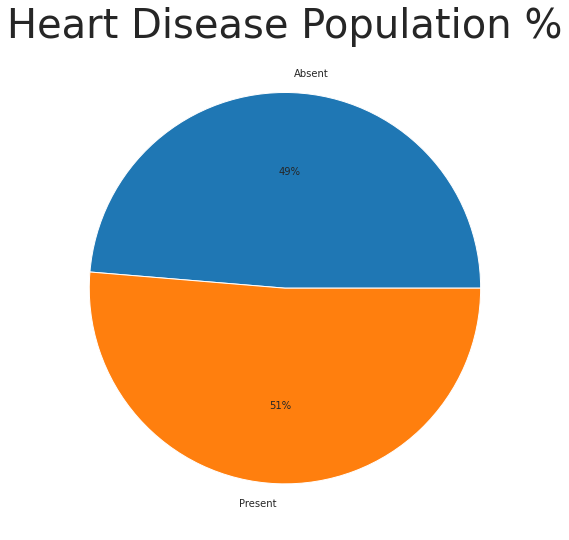

In [12]:
#Pie chart representing the percentage count of heart_disease

plt.figure(figsize=(10,9))
plt.pie(xy, labels=['Absent','Present'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=40)
plt.show()

*From the above graph people having heart disease (46%) < people not having heart disease (56%).*

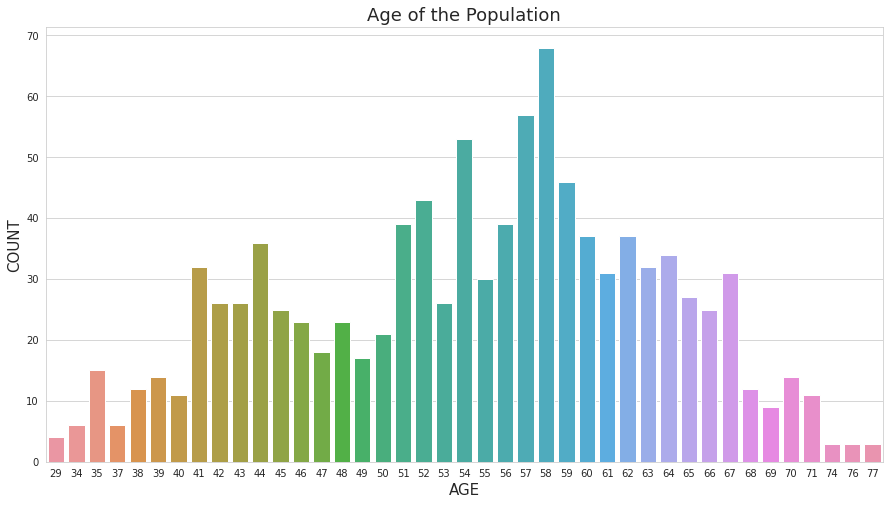

In [13]:
#Histogram countplot of Age of the population

plt.figure(figsize=(15,8))
sns.countplot(x ='age', data = data)
plt.title('Age of the Population', fontsize = 18)
plt.xlabel('AGE',fontsize = 15)
plt.ylabel('COUNT', fontsize = 15)
plt.show()

Further grouping the population based on Age into.

*   Elderly
*   Middle-age
*   Young

In [14]:
Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)
     

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [15]:
#Categorical Analysis

Young_Age = data[(data['age']>=29) & (data['age']<40)]
Middle_Age = data[(data['age']>=40) & (data['age']<55)]
Elderly_Age = data[(data['age']>55)]
print('Young Ages =',len(Young_Age))
print('Middle Ages =',len(Middle_Age))
print('Elderly Ages =',len(Elderly_Age))
     

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


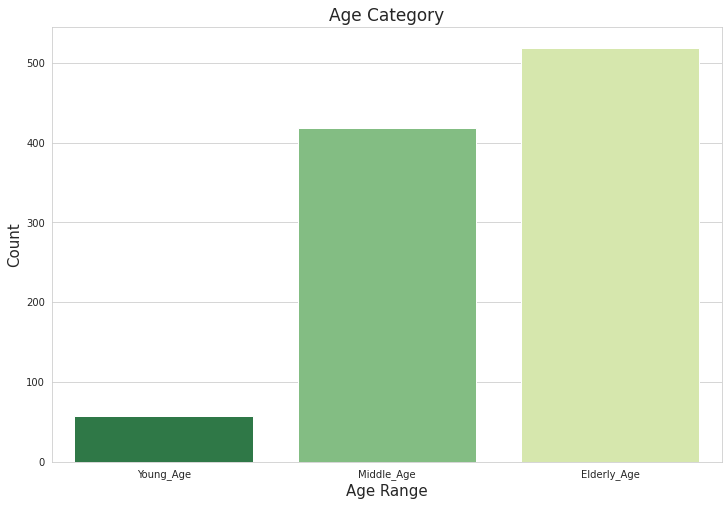

In [16]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn
plt.figure(figsize=(12,8))
sns.barplot(x=['Young_Age','Middle_Age','Elderly_Age'], y=[len(Young_Age), len(Middle_Age), len(Elderly_Age)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [17]:
#Converting Numerical Data of sex into Categorical Data

def gender(row):
    if row == 1:
        return 'Male'
    elif row == 0:
        return 'Female'

In [18]:
data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,Female


In [19]:
#Converting Numerical Data of age into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [20]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,Female,Elder Age


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


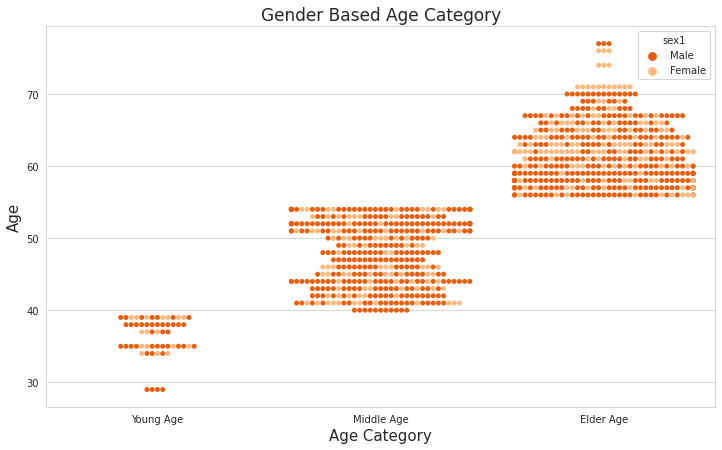

In [21]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(12,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

Interesting observation in the above plot is :

Number of Male population is more in 'Middle Age' Category

Number of Female population is more in 'Elder Age' Category



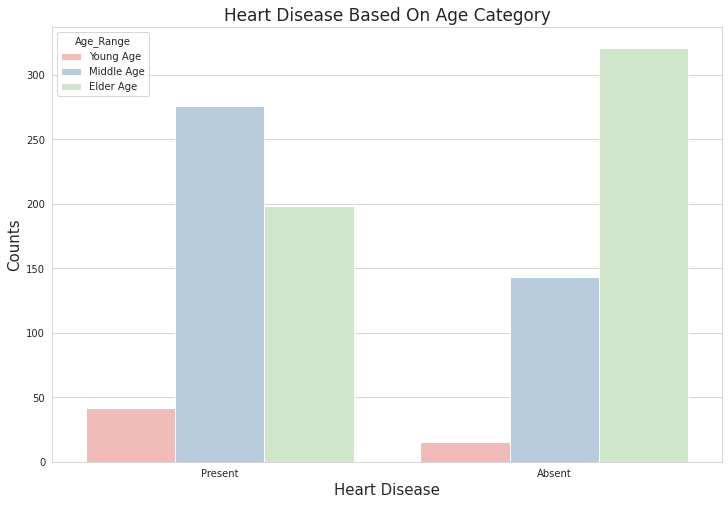

In [26]:
#Count Plotof Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='heart_disease', hue='Age_Range', data=data, order=['Present','Absent'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


*   Elderly Age population is suffering from heart_disease while,
*   Most of the Young and Middle Age population are free from heart_disease.

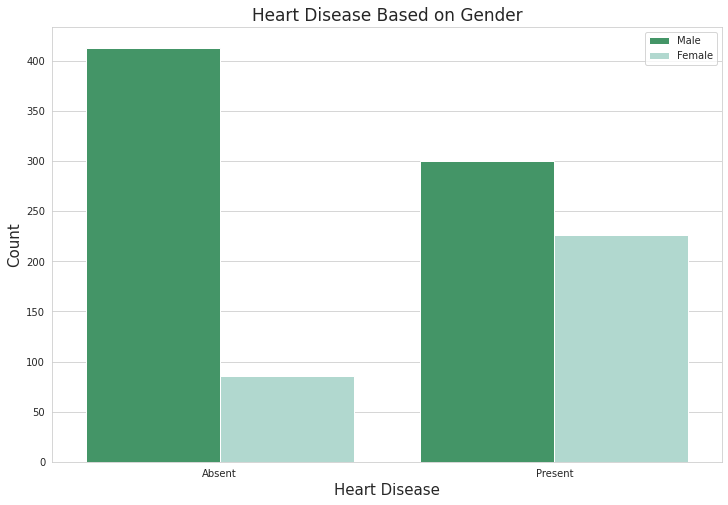

In [27]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['heart_disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

MALE population is more prone to heart disease than FEMALE.

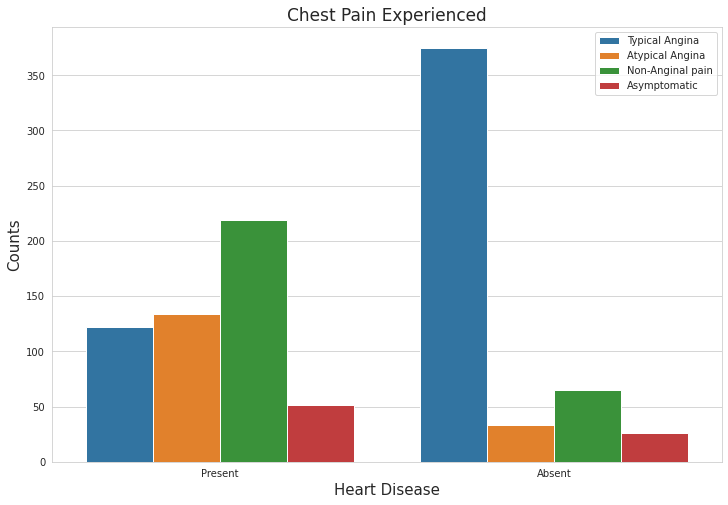

In [30]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['heart_disease'], hue='cp', data=data, order=['Present','Absent'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

It seems that people with asymptomatic chest pain are more prone to heart disease.

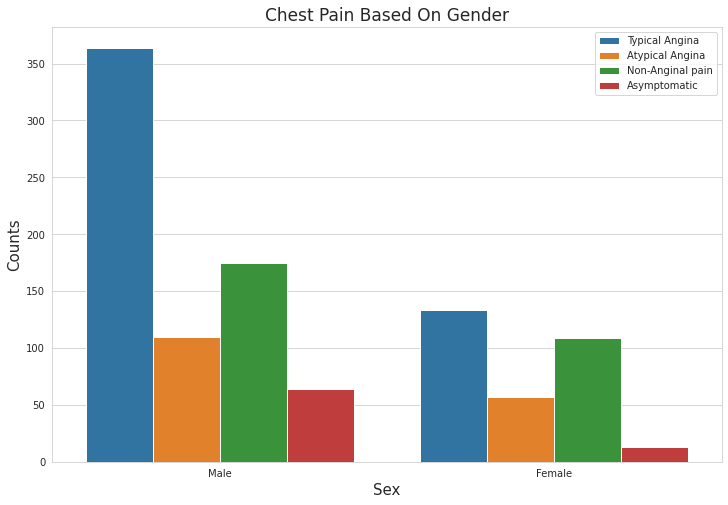

In [31]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

Typical Angina chestpain is more in male population than female.

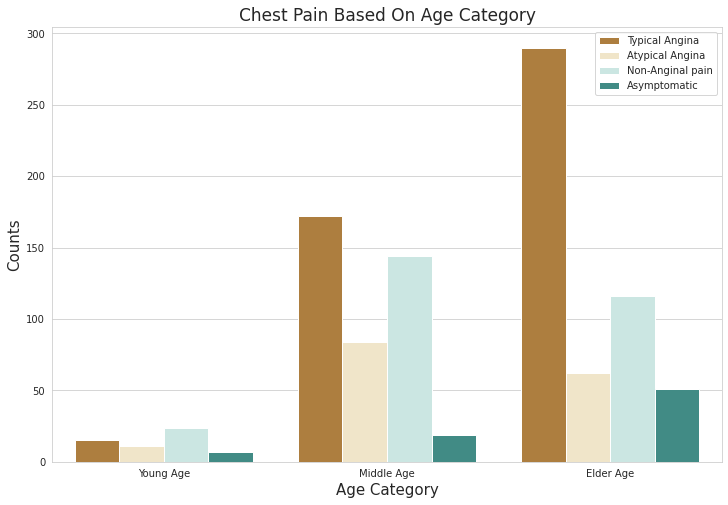

In [32]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

Typical Angina chestpain is more present in Elder Age and Middle Age category.



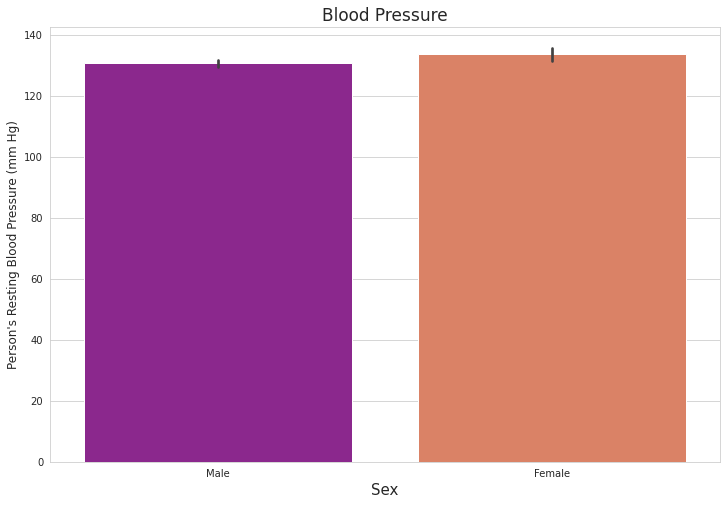

In [33]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

Blood Pressure rate is almost equal in both Male and Female.

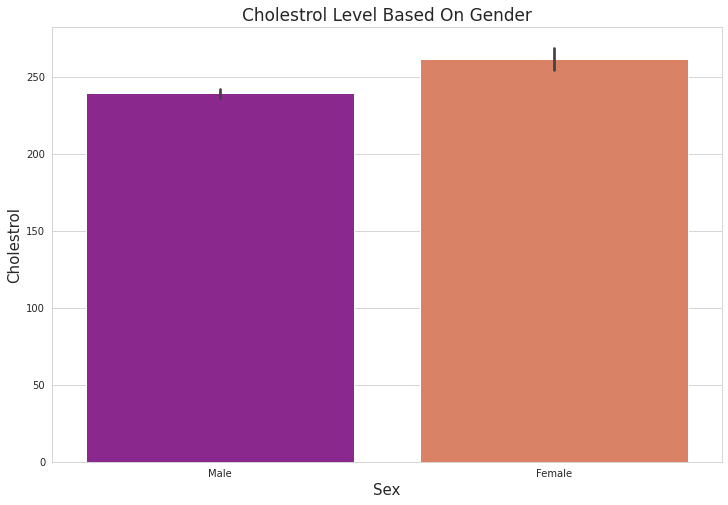

In [34]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='chol', data=data, palette='plasma')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

Cholestrol level more in female population than male population.

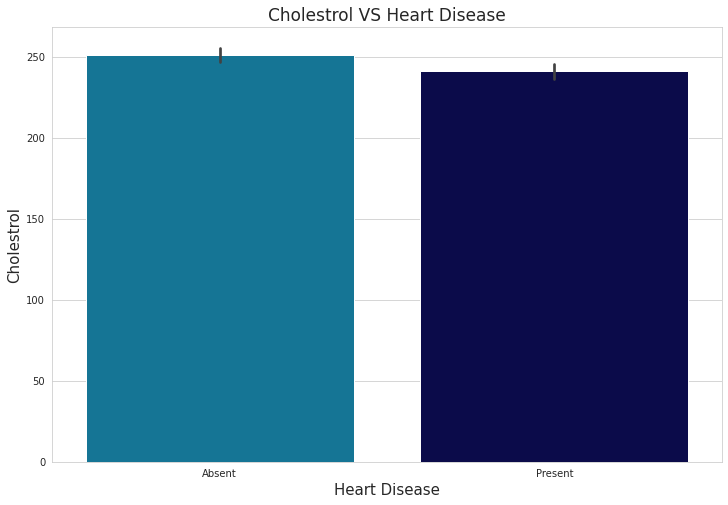

In [35]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='heart_disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

Although we cannot exactly differentiate whether cholestrol rate is highly proportinal to heart disease, it is hihgly correleted to more risk of getting disease.

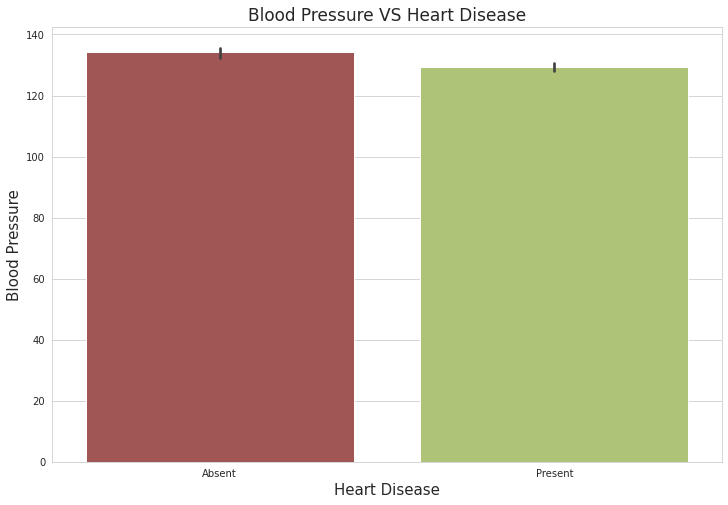

In [36]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='heart_disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

 Having High BP involves more risk of getting heart disease.

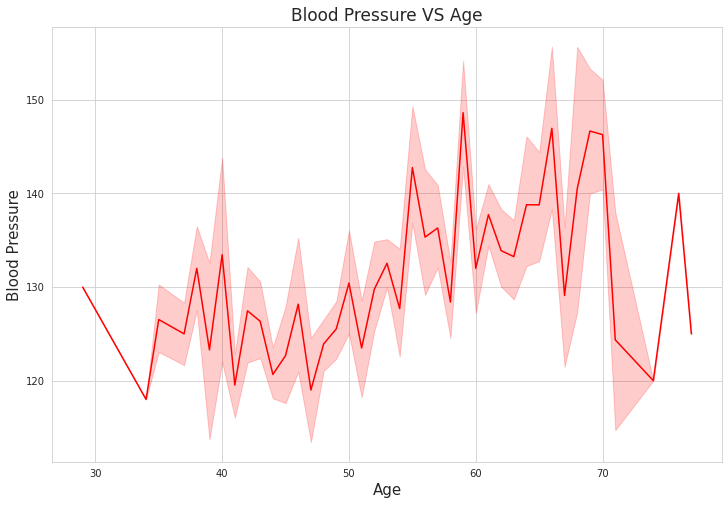

In [37]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

We can see that BP increases from age 50 to 60 and the pattern will somehow tend to continue till 70.

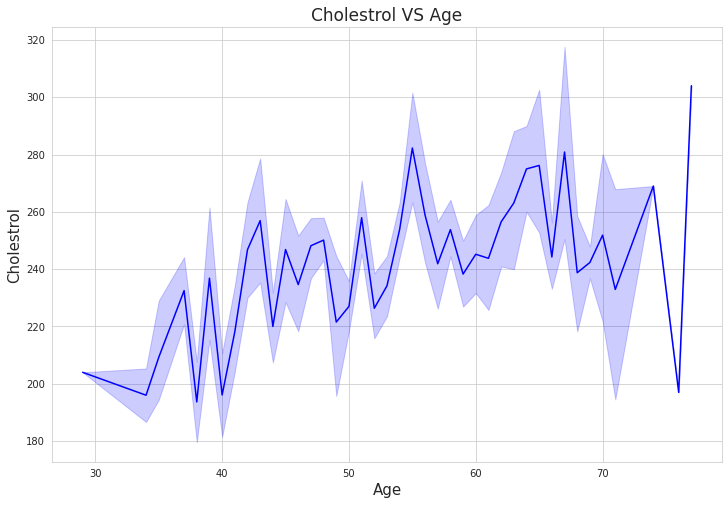

In [38]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

Cholestrol gradually incresing from the age group of 50 - 60.

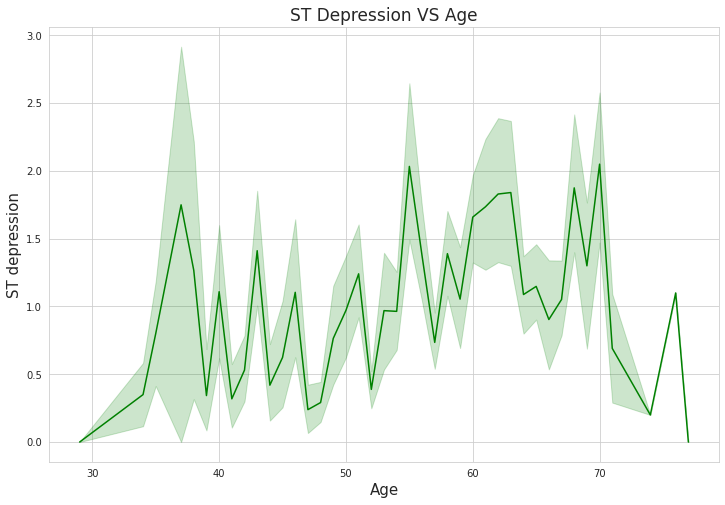

In [39]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

ST depression almost increasing in the age group of 30 to 40.

ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline

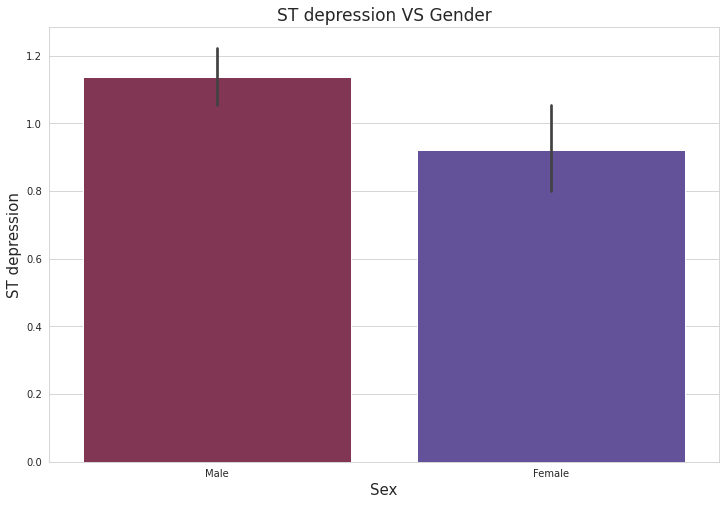

In [41]:
#Bar Plot Creation of ST depression VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

More Males are prone to ST depression than Female.

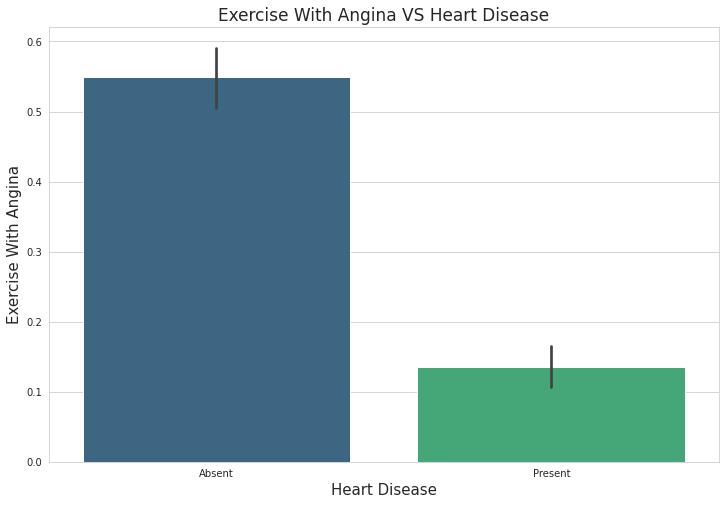

In [42]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='heart_disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

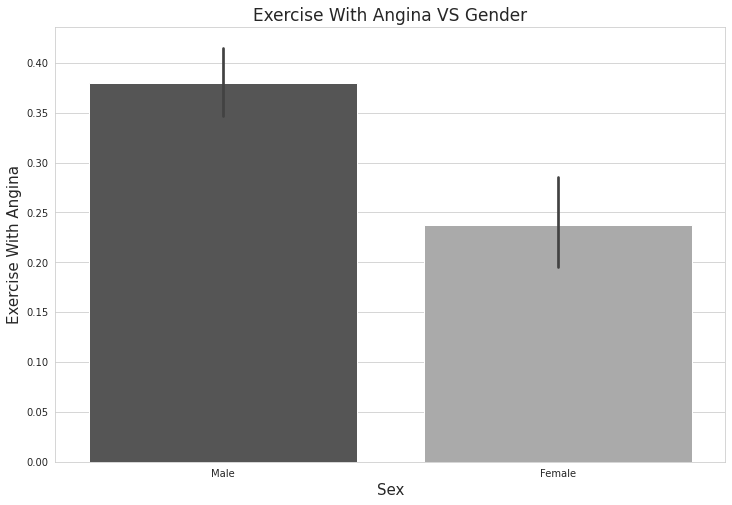

In [43]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

Males have high excersice Anigna

*Anigna is a condition where chest pain occcurs due to low/insufficient blood flow to heart.*



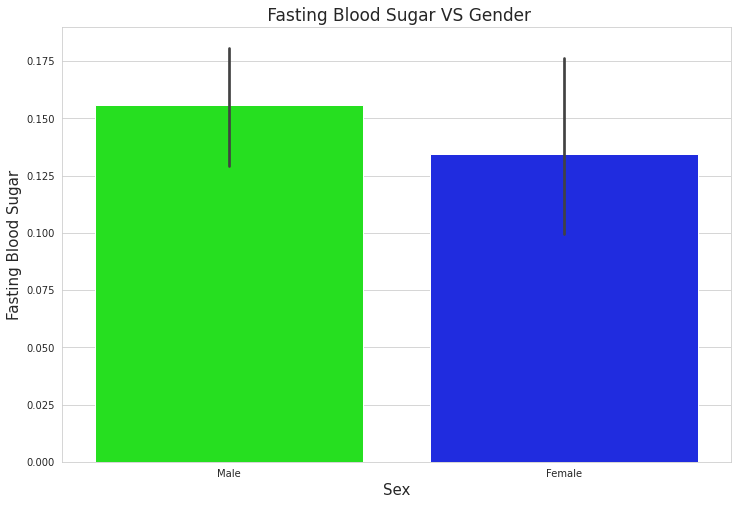

In [44]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

Males have high number of fasting Blood Sugar more than 120.

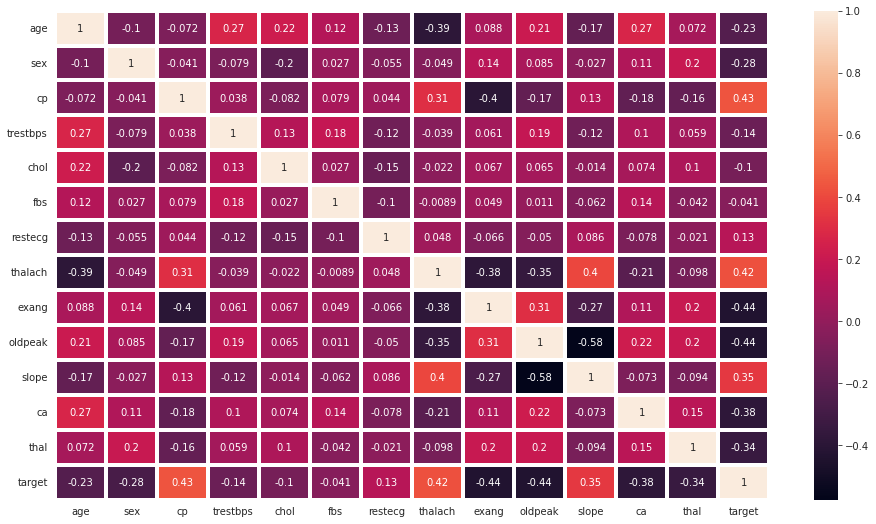

In [45]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)